In [3]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print("First few rows of the data:")
colnames = "sepal_length sepal_width petal_length petal_width"
print(colnames)
print(iris.data[:3])
print("---------------------------------")
print("Column statistics:")
for i, j in enumerate(iris.data[0]):
      print("column: {}, mean: {:.2f}".format(i, np.mean(iris.data[..., i])))
print("---------------------------------")
print("Total number of rows: {}".format(len(iris.data)))
print("Target classes (which type of iris): {}".format(iris.target))
print("Target class names {}".format({i:j for i, j in enumerate(iris.target_names)}))

First few rows of the data:
sepal_length sepal_width petal_length petal_width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
---------------------------------
Column statistics:
column: 0, mean: 5.84
column: 1, mean: 3.06
column: 2, mean: 3.76
column: 3, mean: 1.20
---------------------------------
Total number of rows: 150
Target classes (which type of iris): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target class names {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


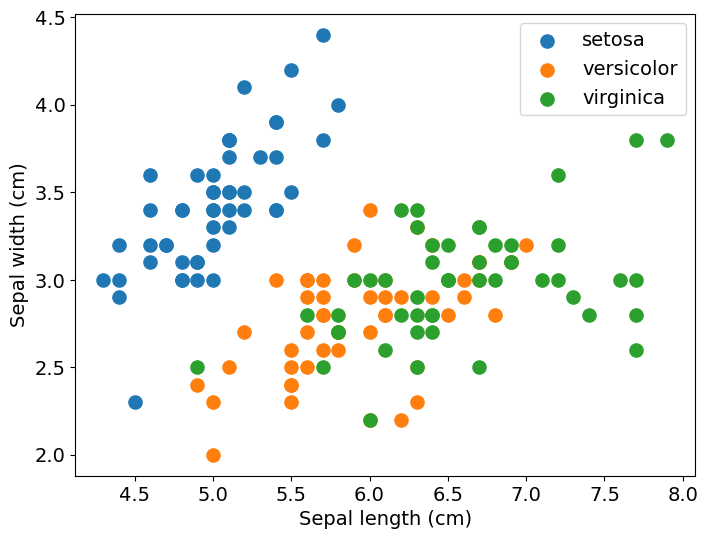

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for i in range(3):
    target_class = iris.target == i
    ax.scatter(iris.data[target_class, 0], iris.data[target_class, 1], s=90, label=iris.target_names[i])
    ax.tick_params(labelsize=14)
    ax.set_xlabel("Sepal length (cm)", size=14)
    ax.set_ylabel("Sepal width (cm)", size=14)
    ax.legend(prop={'size': 14})

In [6]:
from sklearn import neighbors
# ADM use the k-nearest neighbors algorithm (k-NN)
# ADM with distances only to the nearest neighbor.
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data, iris.target)
print(colnames)
mock_data = [5, 4, 1, 0]
print(knn.predict([mock_data]), iris.target_names[knn.predict([mock_data])])
mock_data = [6, 3, 4, 1]
print(knn.predict([mock_data]), iris.target_names[knn.predict([mock_data])])

sepal_length sepal_width petal_length petal_width
[0] ['setosa']
[1] ['versicolor']


In [30]:
# ADM let's map out the entire sepal_length/sepal_width space!
# ADM (I'm restricting to just sepal_length and sepal_width as
# ADM it's easier to picture a 2-D space than a 4-D space).
n = 100000
mock_data = []
# ADM normally I don't condone appending to empty lists, but here
# ADM I want to explicitly illustrate which columns I'm working
# ADM on. This won't be a slow append, as it's only two columns.
for i in range(2):
    print("working on column: {}".format(colnames.split()[i]))
    col_min = np.min(iris.data[..., i])
    col_max = np.max(iris.data[..., i])
    # ADM generate random points in the space corresponding to the
    # ADM iris measurement of interest.
    mock_meas = np.random.random(n)*(col_max - col_min) + col_min
    mock_data.append(mock_meas)
# ADM we now have a list of n*2 measurements, 
# ADM but we want an array of 2 columns and n rows.
mock_data = np.reshape(mock_data, (2, n)).T
mock_data

working on column: sepal_length
working on column: sepal_width


array([[7.4972483 , 4.29619602],
       [7.79958924, 2.88450156],
       [4.52753048, 2.79358218],
       ...,
       [4.33855155, 2.68032724],
       [4.70900219, 3.27552189],
       [4.84700844, 3.07047884]])

In [8]:
# ADM classify using the k-NN "black box"
# ADM trained on the real-world iris data.
# ADM but only use 2 columns as a simple illustration.
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data[..., :2], iris.target)
mock_target_class = knn.predict(mock_data)
# ADM again, this for loop isn't strictly necessary, but
# ADM it's a clear way to print the information to screen.
for i in range(10):
    print(mock_data[i], mock_target_class[i], iris.target_names[mock_target_class[i]])

[7.10007203 2.10536869] 2 virginica
[5.60807464 3.39880381] 0 setosa
[4.94415104 2.72892334] 2 virginica
[4.59784306 2.19595178] 0 setosa
[6.93336028 3.21185106] 2 virginica
[7.34505711 3.27438302] 2 virginica
[7.82211904 3.4441555 ] 2 virginica
[6.1597409  3.62364031] 2 virginica
[7.5826824 3.5046657] 2 virginica
[6.89955014 2.20862587] 2 virginica


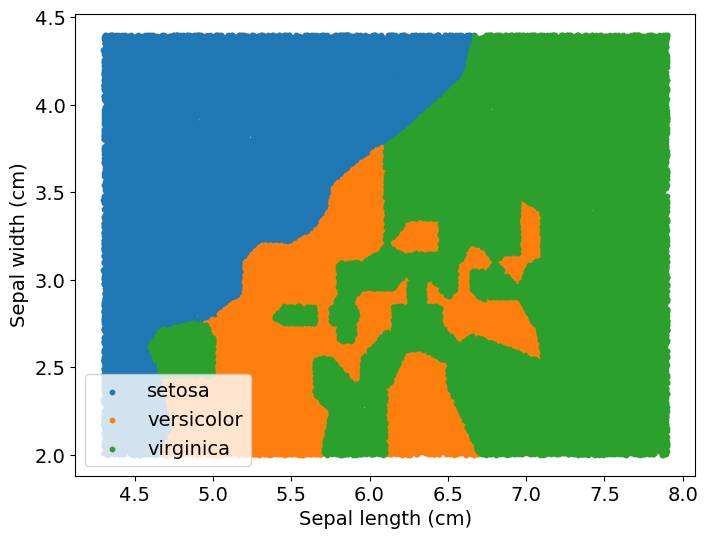

In [9]:
# ADM let's plot the sepal_length, sepal_width space of the k-NN classifier.
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for i in range(3):
    target_class = mock_target_class == i
    ax.scatter(mock_data[target_class, 0], mock_data[target_class, 1], s=10, label=iris.target_names[i])
    ax.tick_params(labelsize=14)
    ax.set_xlabel("Sepal length (cm)", size=14)
    ax.set_ylabel("Sepal width (cm)", size=14)
    ax.legend(prop={'size': 14})

In [40]:
qso = np.loadtxt('/d/users/kaiwen/Downloads/qso_selected.txt')
star = np.loadtxt('/d/users/kaiwen/Downloads/star.txt')

In [174]:
star_no_detection = (star[:, 2] == np.inf) | (star[:, 3] == np.inf) | (star[:, 4] == np.inf) | (star[:, 5] == np.inf) | (np.isnan(star[:, 5])) | (np.isnan(star[:, 3])) | (np.isnan(star[:, 4])) | (np.isnan(star[:, 2]))
star_detected = star[~star_no_detection]

qso_no_detection = (np.isnan(qso[:, 5])) | (np.isnan(qso[:, 3])) | (np.isnan(qso[:, 4])) | (np.isnan(qso[:, 2]))
qso_detected = qso[~qso_no_detection]

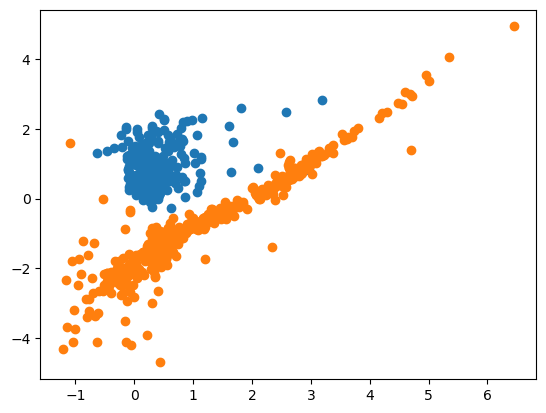

In [176]:
plt.scatter(qso_detected[:, 2] - qso_detected[:, 4], qso_detected[:, 3] - qso_detected[:, 5])
plt.scatter(star_detected[:, 2] - star_detected[:, 4], star_detected[:, 3] - star_detected[:, 5])

In [177]:
star_mag = np.vstack((star_detected[:, 2] - star_detected[:, 4], star_detected[:, 3] - star_detected[:, 5])).T
qso_mag = np.vstack((qso_detected[:, 2] - qso_detected[:, 4], qso_detected[:, 3] - qso_detected[:, 5])).T

In [186]:
star_subsample = np.random.randint(0, len(star_detected), 300)
data = np.concatenate([qso_mag, star_mag[star_subsample]])
data_class = np.concatenate([np.zeros(len(qso_detected)),np.ones(len(star_detected[star_subsample]))])
target_names = np.array(["QSO", "STAR"])

In [187]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(data, data_class)

KNeighborsClassifier(n_neighbors=3)

In [196]:
star_subsample_test = np.random.randint(0, len(star_detected), 300)
predicted_class = knn.predict(star_mag[star_subsample_test])
print(predicted_class, target_names[predicted_class.astype(int)])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] ['STAR' 'STAR' 'STAR' 'STAR' 'STAR' 'STAR' 'STAR' 'STAR' 'STAR' 'STAR'
 'STAR' 'STAR' 

## There is one false positive. Statistically, this is pretty good!